<a href="https://colab.research.google.com/github/MarahRamadan/TensorFlow/blob/master/TensorFlow_Exercises_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ImageGenerator can flow images from a directory and perform operations such as resizing them on the fly, the next thing to do is design the neural network to handle these more complex images. You’ll see that in the next video

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [36]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-05-19 21:38:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  30.0MB/s    in 4.4s    

2020-05-19 21:38:24 (32.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



The following python code will use the OS library to use Operating System libraries, giving you access to the file system, and the zipfile library allowing you to unzip the data. 

In [0]:
import os
import zipfile

local_zip= '/tmp/horse-or-human.zip'
zip_refer = zipfile.ZipFile(local_zip,'r')
zip_refer.extractall('/tmp/horse-or-human')
zip_refer.close()

In [38]:
!ls /tmp/horse-or-human

horses	humans


The contents of the .zip are extracted to the base directory `/tmp/horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like', 'this is what a human looks like' etc. 

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. in handwriting example , we had labelled 'this is a 1', 'this is a 7' etc.  

Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

Let's define each of these directories (as a variable):

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

Now, let's see what the filenames look like in the `horses` and `humans` training directories:

In [40]:
train_horse_name = os.listdir(train_horse_dir)
print(train_horse_name[0])

train_humans_name = os.listdir(train_human_dir)
print(train_humans_name[0])

horse40-8.png
human09-04.png


In [41]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = ncol = 4
pic_index =0


Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

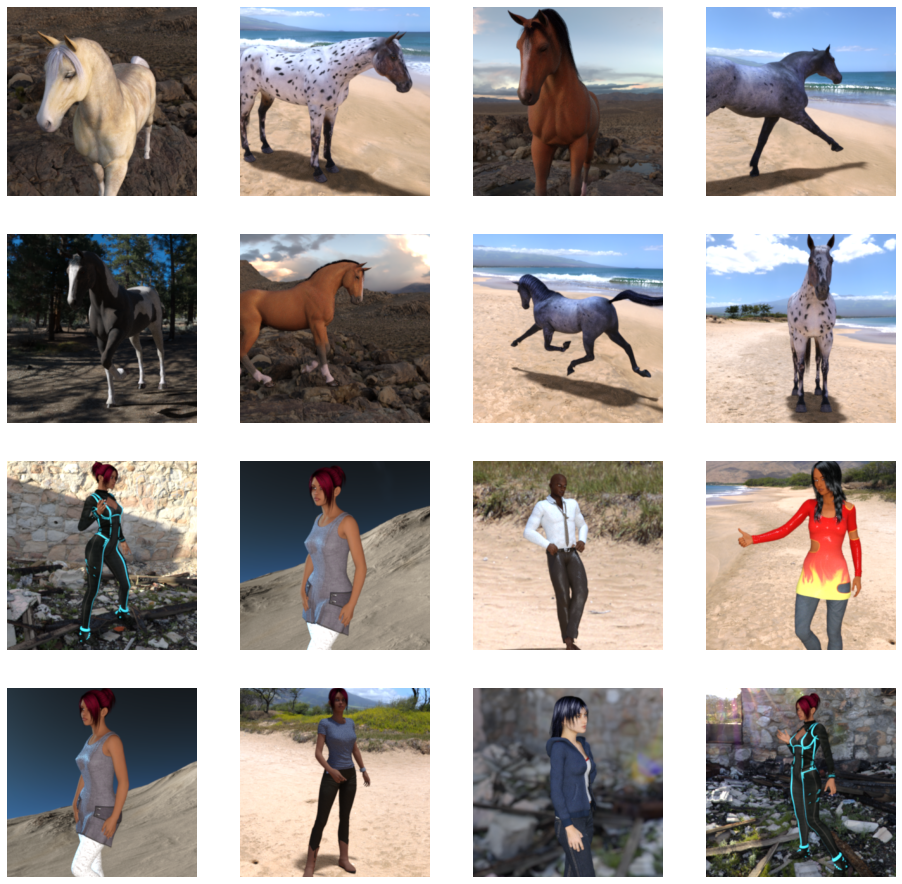

In [44]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncol * 4, nrows * 4)

pic_index += 8

#Picture index
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_humans_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncol, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])


Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding(Margine) , and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), **because RMSprop automates learning-rate tuning for us**. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datgen = ImageDataGenerator(rescale=1.0/255)
training_generator =  train_datgen.flow_from_directory(
    '/tmp/horse-or-human/',  # This is the source directory for training images
     target_size = (300, 300), # All images will be resized 
     batch_size = 128,
     class_mode ='binary'
)

Found 1027 images belonging to 2 classes.


In [50]:
history = model.fit(
    training_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose= 2)

Epoch 1/15
8/8 - 5s - loss: 1.1429 - accuracy: 0.4905
Epoch 2/15
8/8 - 5s - loss: 0.6457 - accuracy: 0.6307
Epoch 3/15
8/8 - 5s - loss: 0.7196 - accuracy: 0.5962
Epoch 4/15
8/8 - 6s - loss: 0.8087 - accuracy: 0.7864
Epoch 5/15
8/8 - 5s - loss: 0.5119 - accuracy: 0.8454
Epoch 6/15
8/8 - 5s - loss: 0.3821 - accuracy: 0.8721
Epoch 7/15
8/8 - 5s - loss: 0.2664 - accuracy: 0.8999
Epoch 8/15
8/8 - 5s - loss: 0.1691 - accuracy: 0.9433
Epoch 9/15
8/8 - 6s - loss: 1.4829 - accuracy: 0.8454
Epoch 10/15
8/8 - 5s - loss: 0.1476 - accuracy: 0.9541
Epoch 11/15
8/8 - 5s - loss: 0.0630 - accuracy: 0.9834
Epoch 12/15
8/8 - 5s - loss: 0.5439 - accuracy: 0.9066
Epoch 13/15
8/8 - 5s - loss: 0.0737 - accuracy: 0.9867
Epoch 14/15
8/8 - 5s - loss: 0.8745 - accuracy: 0.9288
Epoch 15/15
8/8 - 5s - loss: 0.1912 - accuracy: 0.9388


###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [52]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving 61d4c8395437da08ffdd4e0d577eb682.jpeg to 61d4c8395437da08ffdd4e0d577eb682 (2).jpeg
[0.]
61d4c8395437da08ffdd4e0d577eb682.jpeg is a horse


**Adding validation set**

In [53]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-05-19 21:44:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  50.7MB/s    in 0.2s    

2020-05-19 21:44:38 (50.7 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [54]:
import os
import zipfile

zip_loc = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(zip_loc, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/validation-horse-or-human.zip' mode='r'>>

In [66]:
!ls /tmp/validation-horse-or-human

horses	humans


Create varibles that pointed at our subdirectories

In [0]:
val_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')
val_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Check out the filenames in it

In [68]:
val_horse_name = os.listdir(val_horse_dir)
val_human_name  = os.listdir(val_human_dir)

print(val_horse_name[:10])
print(val_human_name[:10])

['horse5-018.png', 'horse6-218.png', 'horse3-198.png', 'horse4-548.png', 'horse3-326.png', 'horse3-484.png', 'horse2-069.png', 'horse1-264.png', 'horse5-065.png', 'horse3-416.png']
['valhuman02-00.png', 'valhuman03-01.png', 'valhuman05-03.png', 'valhuman03-20.png', 'valhuman03-23.png', 'valhuman01-02.png', 'valhuman02-17.png', 'valhuman01-24.png', 'valhuman01-07.png', 'valhuman05-06.png']


In [69]:
print('total validation horse images:',len(val_horse_name))
print('total validation human images:',len(os.listdir(val_human_dir)))

total validation horse images: 128
total validation human images: 128


Now let's take a look at a few pictures to get a better sense of what they look like. First, configure the matplot parameters:

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

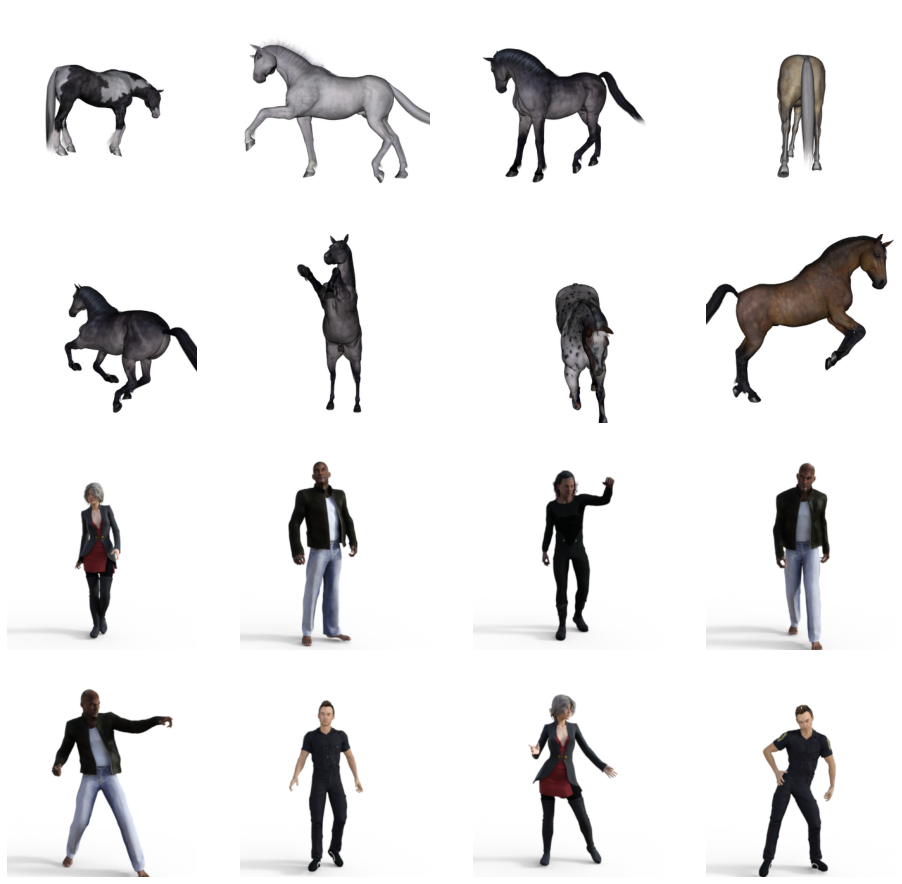

In [71]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(val_horse_dir, fname) 
                for fname in val_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(val_human_dir, fname) 
                for fname in val_human_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


### Data Preprocessing

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [72]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_datagen.flow_from_directory(
                '/tmp/validation-horse-or-human',
                target_size = (300, 300),
                batch_size = 32,
                class_mode='binary'
)

Found 256 images belonging to 2 classes.


### Building another Model from Scratch
Which will fit (Training generator and Validation Generator)

In [0]:
import tensorflow as tf

In [0]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')])


Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [75]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding(Margine) , and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), **because RMSprop automates learning-rate tuning for us**. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [0]:
model2.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.RMSprop(lr=0.001),
              metrics=['accuracy'])

In [77]:
model2.fit(training_generator,
           steps_per_epoch =8 ,
           epochs= 15,
           verbose =1,
           validation_data = val_generator,
           validation_steps=8)

Epoch 1/15
8/8 [==============================] - 6s 784ms/step - loss: 0.8214 - accuracy: 0.5617 - val_loss: 0.6674 - val_accuracy: 0.8672
Epoch 2/15
8/8 [==============================] - 6s 771ms/step - loss: 0.6768 - accuracy: 0.6363 - val_loss: 0.6957 - val_accuracy: 0.5039
Epoch 3/15
8/8 [==============================] - 6s 764ms/step - loss: 0.5157 - accuracy: 0.7508 - val_loss: 0.9368 - val_accuracy: 0.5703
Epoch 4/15
8/8 [==============================] - 6s 767ms/step - loss: 0.3370 - accuracy: 0.8732 - val_loss: 1.1866 - val_accuracy: 0.7891
Epoch 5/15
8/8 [==============================] - 6s 767ms/step - loss: 0.2391 - accuracy: 0.9010 - val_loss: 0.3171 - val_accuracy: 0.8828
Epoch 6/15
8/8 [==============================] - 6s 755ms/step - loss: 0.2491 - accuracy: 0.9433 - val_loss: 1.5470 - val_accuracy: 0.7969
Epoch 7/15
8/8 [==============================] - 6s 767ms/step - loss: 0.1264 - accuracy: 0.9444 - val_loss: 0.9542 - val_accuracy: 0.8398
Epoch 8/15
8/8 [====

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [79]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving 61d4c8395437da08ffdd4e0d577eb682.jpeg to 61d4c8395437da08ffdd4e0d577eb682 (3).jpeg
[0.]
61d4c8395437da08ffdd4e0d577eb682.jpeg is a horse


### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


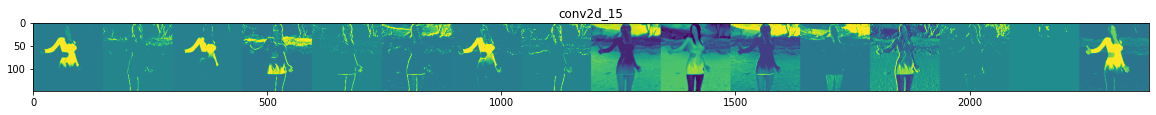

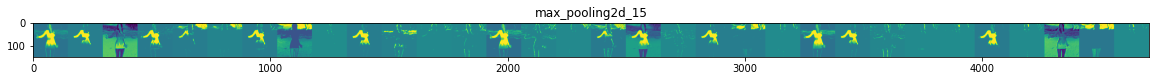

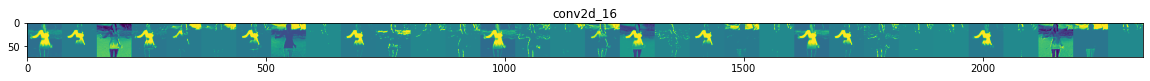

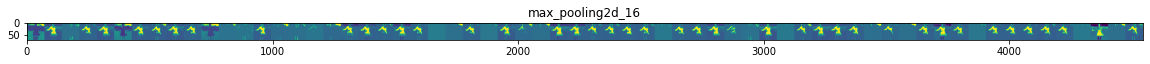

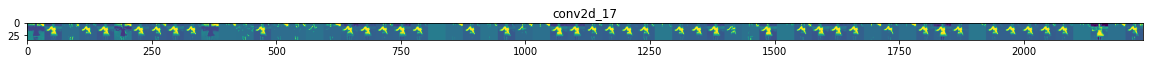

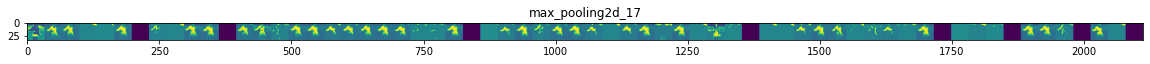

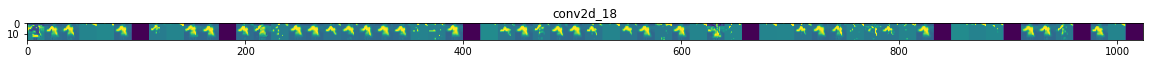

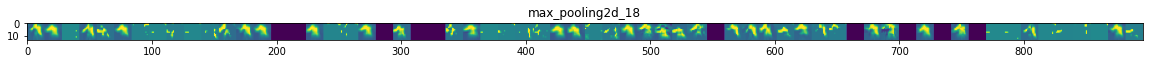

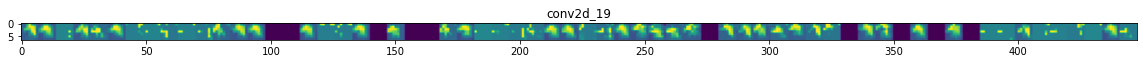

In [80]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model2.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model2.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_name]
human_img_files = [os.path.join(train_human_dir, f) for f in train_humans_name]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model2.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)